In [10]:
import json
import os

import cv2
import matplotlib
import numpy as np
import pandas as pd
from keras.layers import Dense, Activation, Dropout, Convolution2D, MaxPooling2D, Flatten, Lambda
from keras.models import Sequential
from keras.models import model_from_json
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array, load_img

%matplotlib inline
matplotlib.style.use('ggplot')

TARGET_SIZE = (64, 64)
BATCH_SIZE = 32

data_dir = './data/'
data_csv = './data/driving_log.csv'
model_json = 'model.json'
model_weights = 'model.h5'

In [11]:
def normalize(X):
    X = X / 255.0
    return X


def equalize_channel(X):
    for i in range(0, 3):
        channel = X[:, :, i]
        channel = channel.astype(np.uint8)
        channel = cv2.equalizeHist(channel)
        X[:, :, i] = channel
    return X

def crop_and_resize(image):
    '''
    : The input image of dimensions 160x320x3
    : return: Output image of size 64x64x3
    '''
    cropped_image = image[55:135, :, :]
    processed_image = resize_to_target_size(cropped_image)
    return processed_image

def resize_to_target_size(image):
    return cv2.resize(image, TARGET_SIZE)

def pre_process(image):
    image = load_img("./data/" + image.strip())
    image = img_to_array(image)
    image = crop_and_resize(image)
    image = image.astype(np.float32)
    # Normalize image
    image = image / 255.0 - 0.5
    return image



In [12]:
# load all images
# [center,left,right,steering,throttle,brake,speed]
import csv
def read_driving_log():
    center_images = {}
    left_images = {}
    right_images = {}
    i =0
    with open(data_csv) as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if (float(row['steering']) == 0) : continue
                
            i+=1
            center_images[float(row['steering'])] = row['center']
            left_images[float(row['steering'])] = row['left']
            right_images[float(row['steering'])] = row['right']
            
            if i == 15: break
        
    return center_images, left_images, right_images

center_imgs, left_imgs, right_imgs = read_driving_log()

In [18]:
import random
import numpy as np
import matplotlib.pyplot as plt

get_ipython().magic('matplotlib inline')
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        }

def plot_images(images_data):
    plt.figure(figsize=(15,15))
    i=0
    for steering_angle, image_path in images_data.items():
        pre_image = pre_process(image_path)
        plt.subplot(4,4,i+1)
        plt.subplots_adjust(left=0.15)
        plt.imshow(pre_image)
        plt.text(0, -2, steering_angle, fontdict=font)
        i+=1

## Visualize Camera Center images along with the steering angle

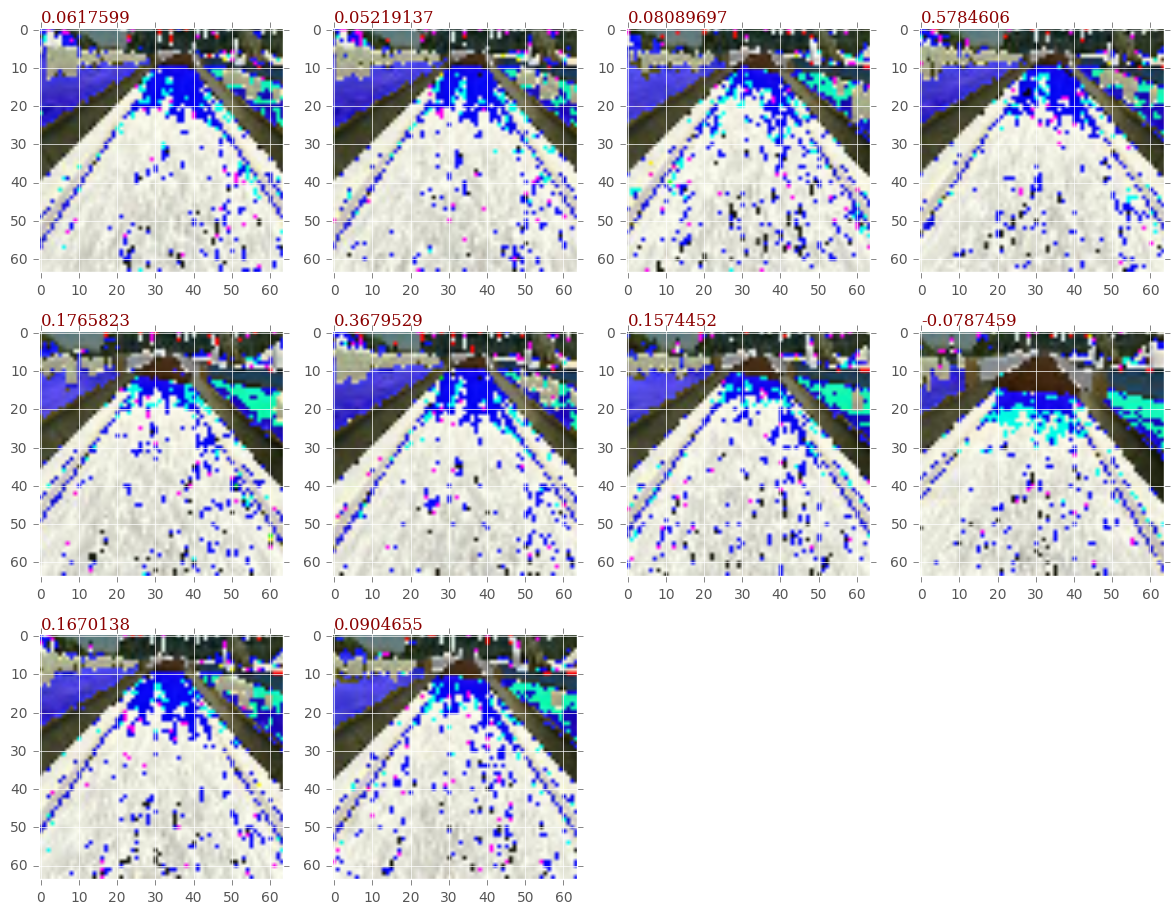

In [19]:
plot_images(center_imgs)

## Visualize Left camera images with its steering angles

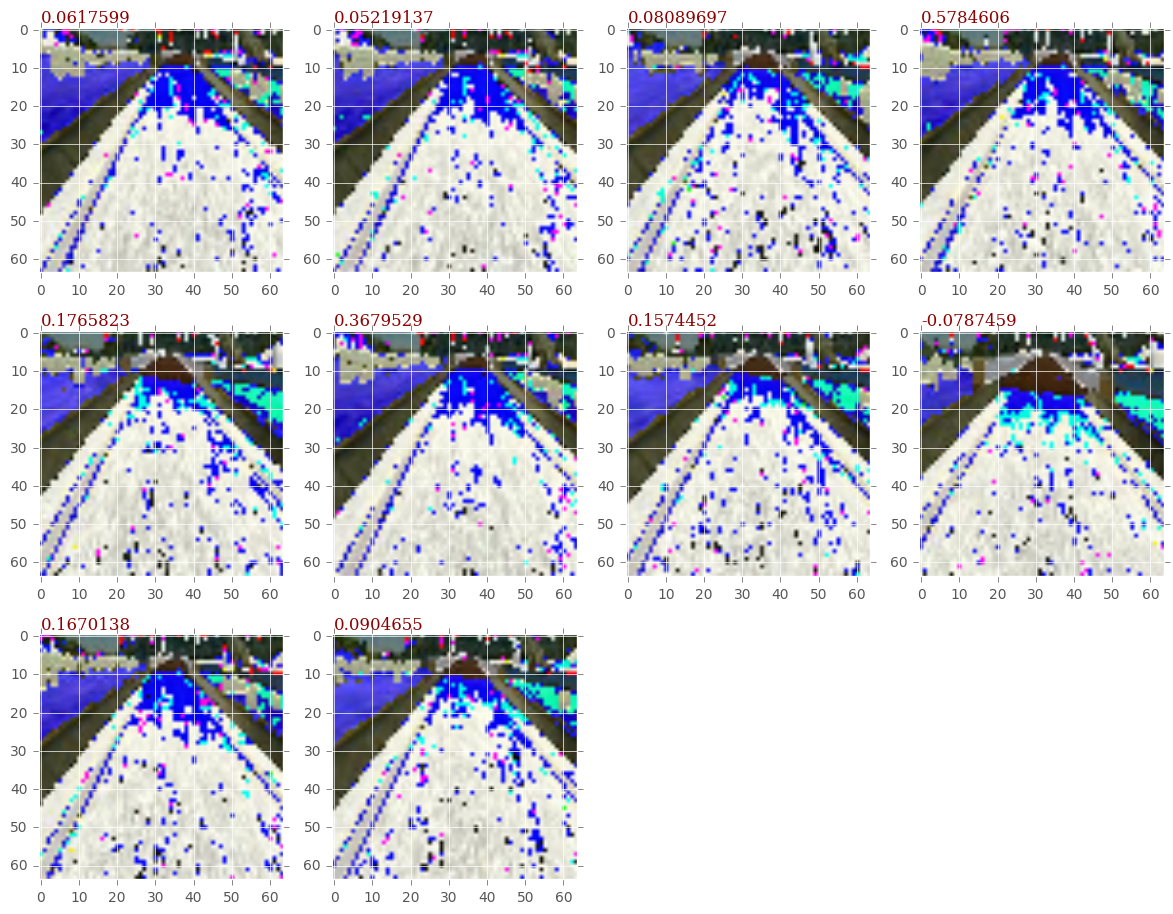

In [20]:
plot_images(left_imgs)

## Visualize Right Camera Images along with Steering angles